### Load libraries.

In [71]:
import geopandas as geopd
import pandas as pd

### Load San Luis Potosi metropolitan area shape file. Source: Marco Geoestadístico INEGI (2023).
#### URL: https://www.inegi.org.mx/temas/mg/ 

In [72]:
# INEGI data
gdf = geopd.read_file("../dataset/SLPMA/geometry/2023_1_24_A/2023_1_24_A.shp")

### Display data frame entries

- CVE_ENT: State code provided by INEGI.
- CVE_MUN: Municipality code provided by INEGI.
- CVE_LOC: Location code provided by INEGI.
- CVE_AGEB: Geographic area provided by INEGI.
- AMBITO: Urban or Rural area.
- geometry: Municipality boundary provided by INEGI (polygons).

In [73]:
display(gdf)

,CVEGEO,CVE_ENT,CVE_MUN,CVE_LOC,CVE_AGEB,AMBITO,geometry
0,2400100010198,24,001,0001,0198,Urbana,"POLYGON ((-101.15796 22.39861, -101.15829 22.3..."
1,2400100010200,24,001,0001,0200,Urbana,"POLYGON ((-101.15675 22.39860, -101.15675 22.3..."
2,2400100010107,24,001,0001,0107,Urbana,"POLYGON ((-101.16092 22.40463, -101.16092 22.4..."
3,2400100010111,24,001,0001,0111,Urbana,"POLYGON ((-101.16742 22.40622, -101.16756 22.4..."
4,2400100010145,24,001,0001,0145,Urbana,"POLYGON ((-101.16331 22.40754, -101.16353 22.4..."
...,...,...,...,...,...,...,...
1577,2405800010237,24,058,0001,0237,Urbana,"POLYGON ((-99.30914 22.53072, -99.30760 22.528..."
1578,2405800010218,24,058,0001,0218,Urbana,"POLYGON ((-99.33210 22.54050, -99.33291 22.540..."
1579,2405800010148,24,058,0001,0148,Urbana,"POLYGON ((-99.32573 22.52434, -99.32573 22.524..."
1580,2405800010133,24,058,0001,0133,Urbana,"POLYGON ((-99.33050 22.53016, -99.33043 22.530..."


### San Luis Potosi metropilitan area consist of two municipalities: San Luis Potosí and Soledad de Graciasno Sánchez (SGS).

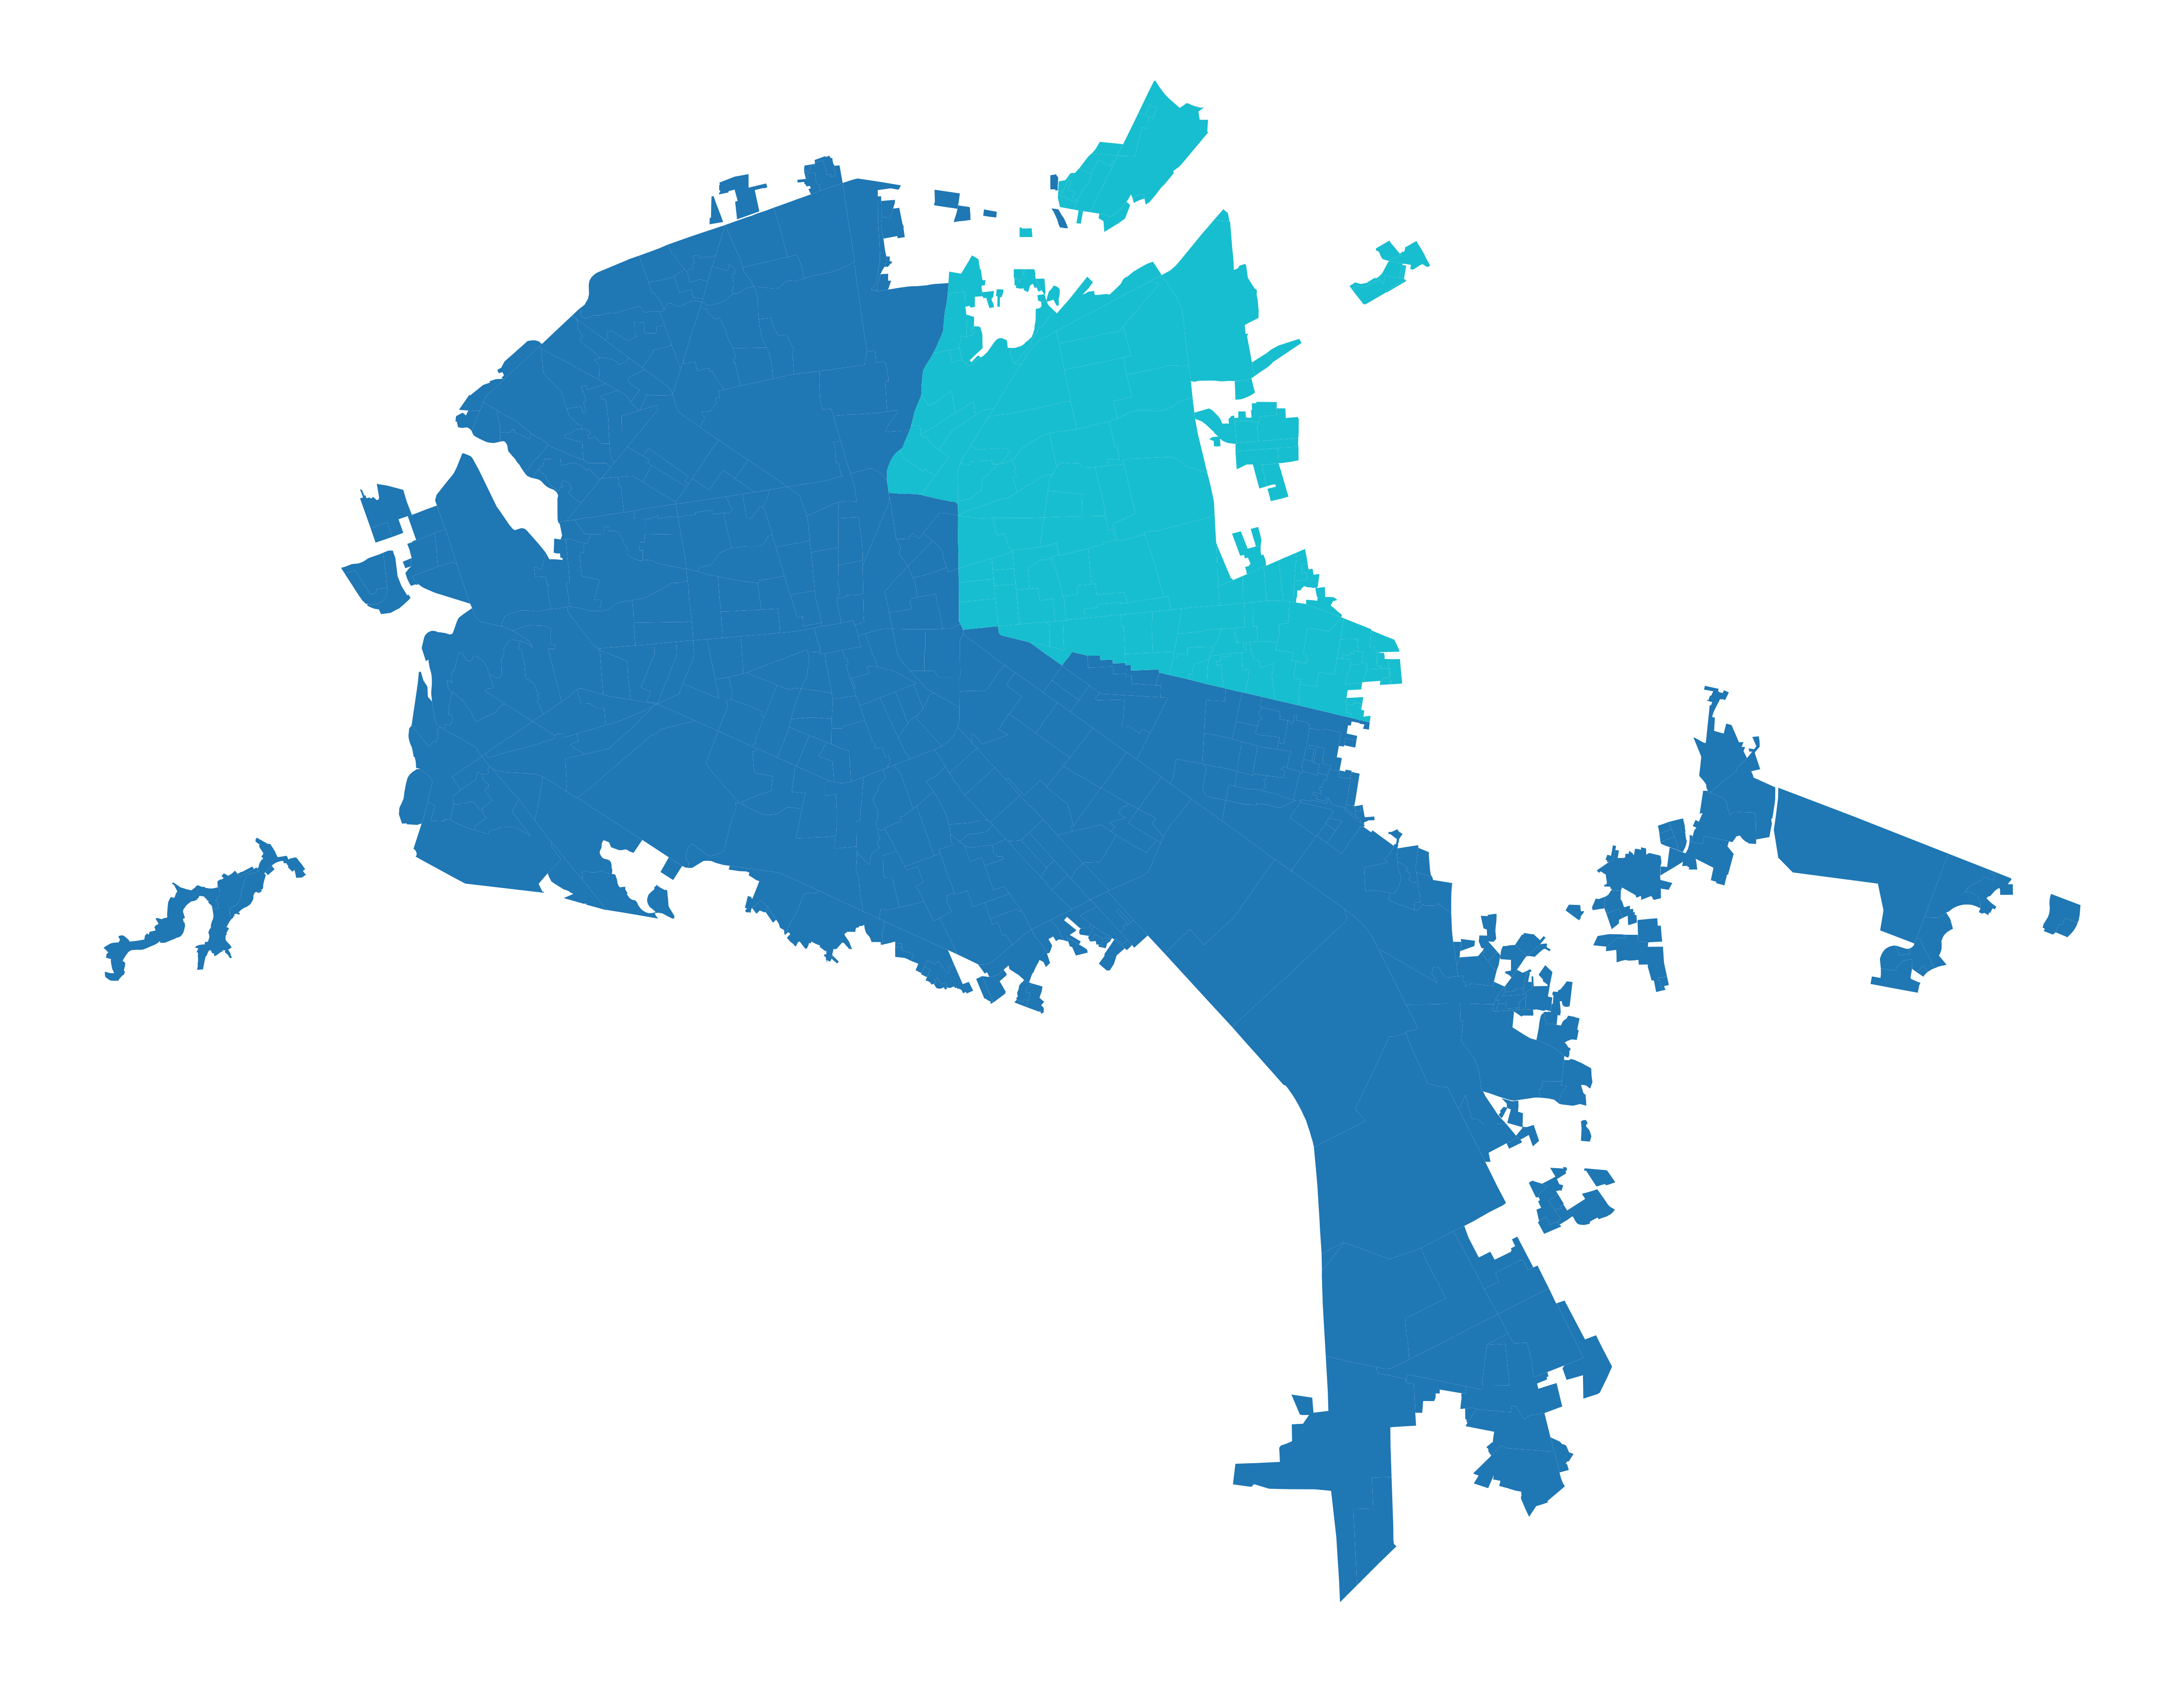

In [74]:
# SLPMA's map labeling each state by a color. 
# AGEBS are identified bya a CVE_ENT code

# SLP
gdf_slp = gdf[gdf["CVE_MUN"] == "028"]

#SGS
gdf_sgs = gdf[ gdf["CVE_MUN"] == "035"]

# Concatenate frames
frames = [gdf_slp, gdf_sgs ]
gdf_zmslp = pd.concat(frames)

# Plot SLP and SGS municipalities
ax = gdf_zmslp.plot(figsize = (60, 60),column="CVE_MUN")
ax.set_axis_off()

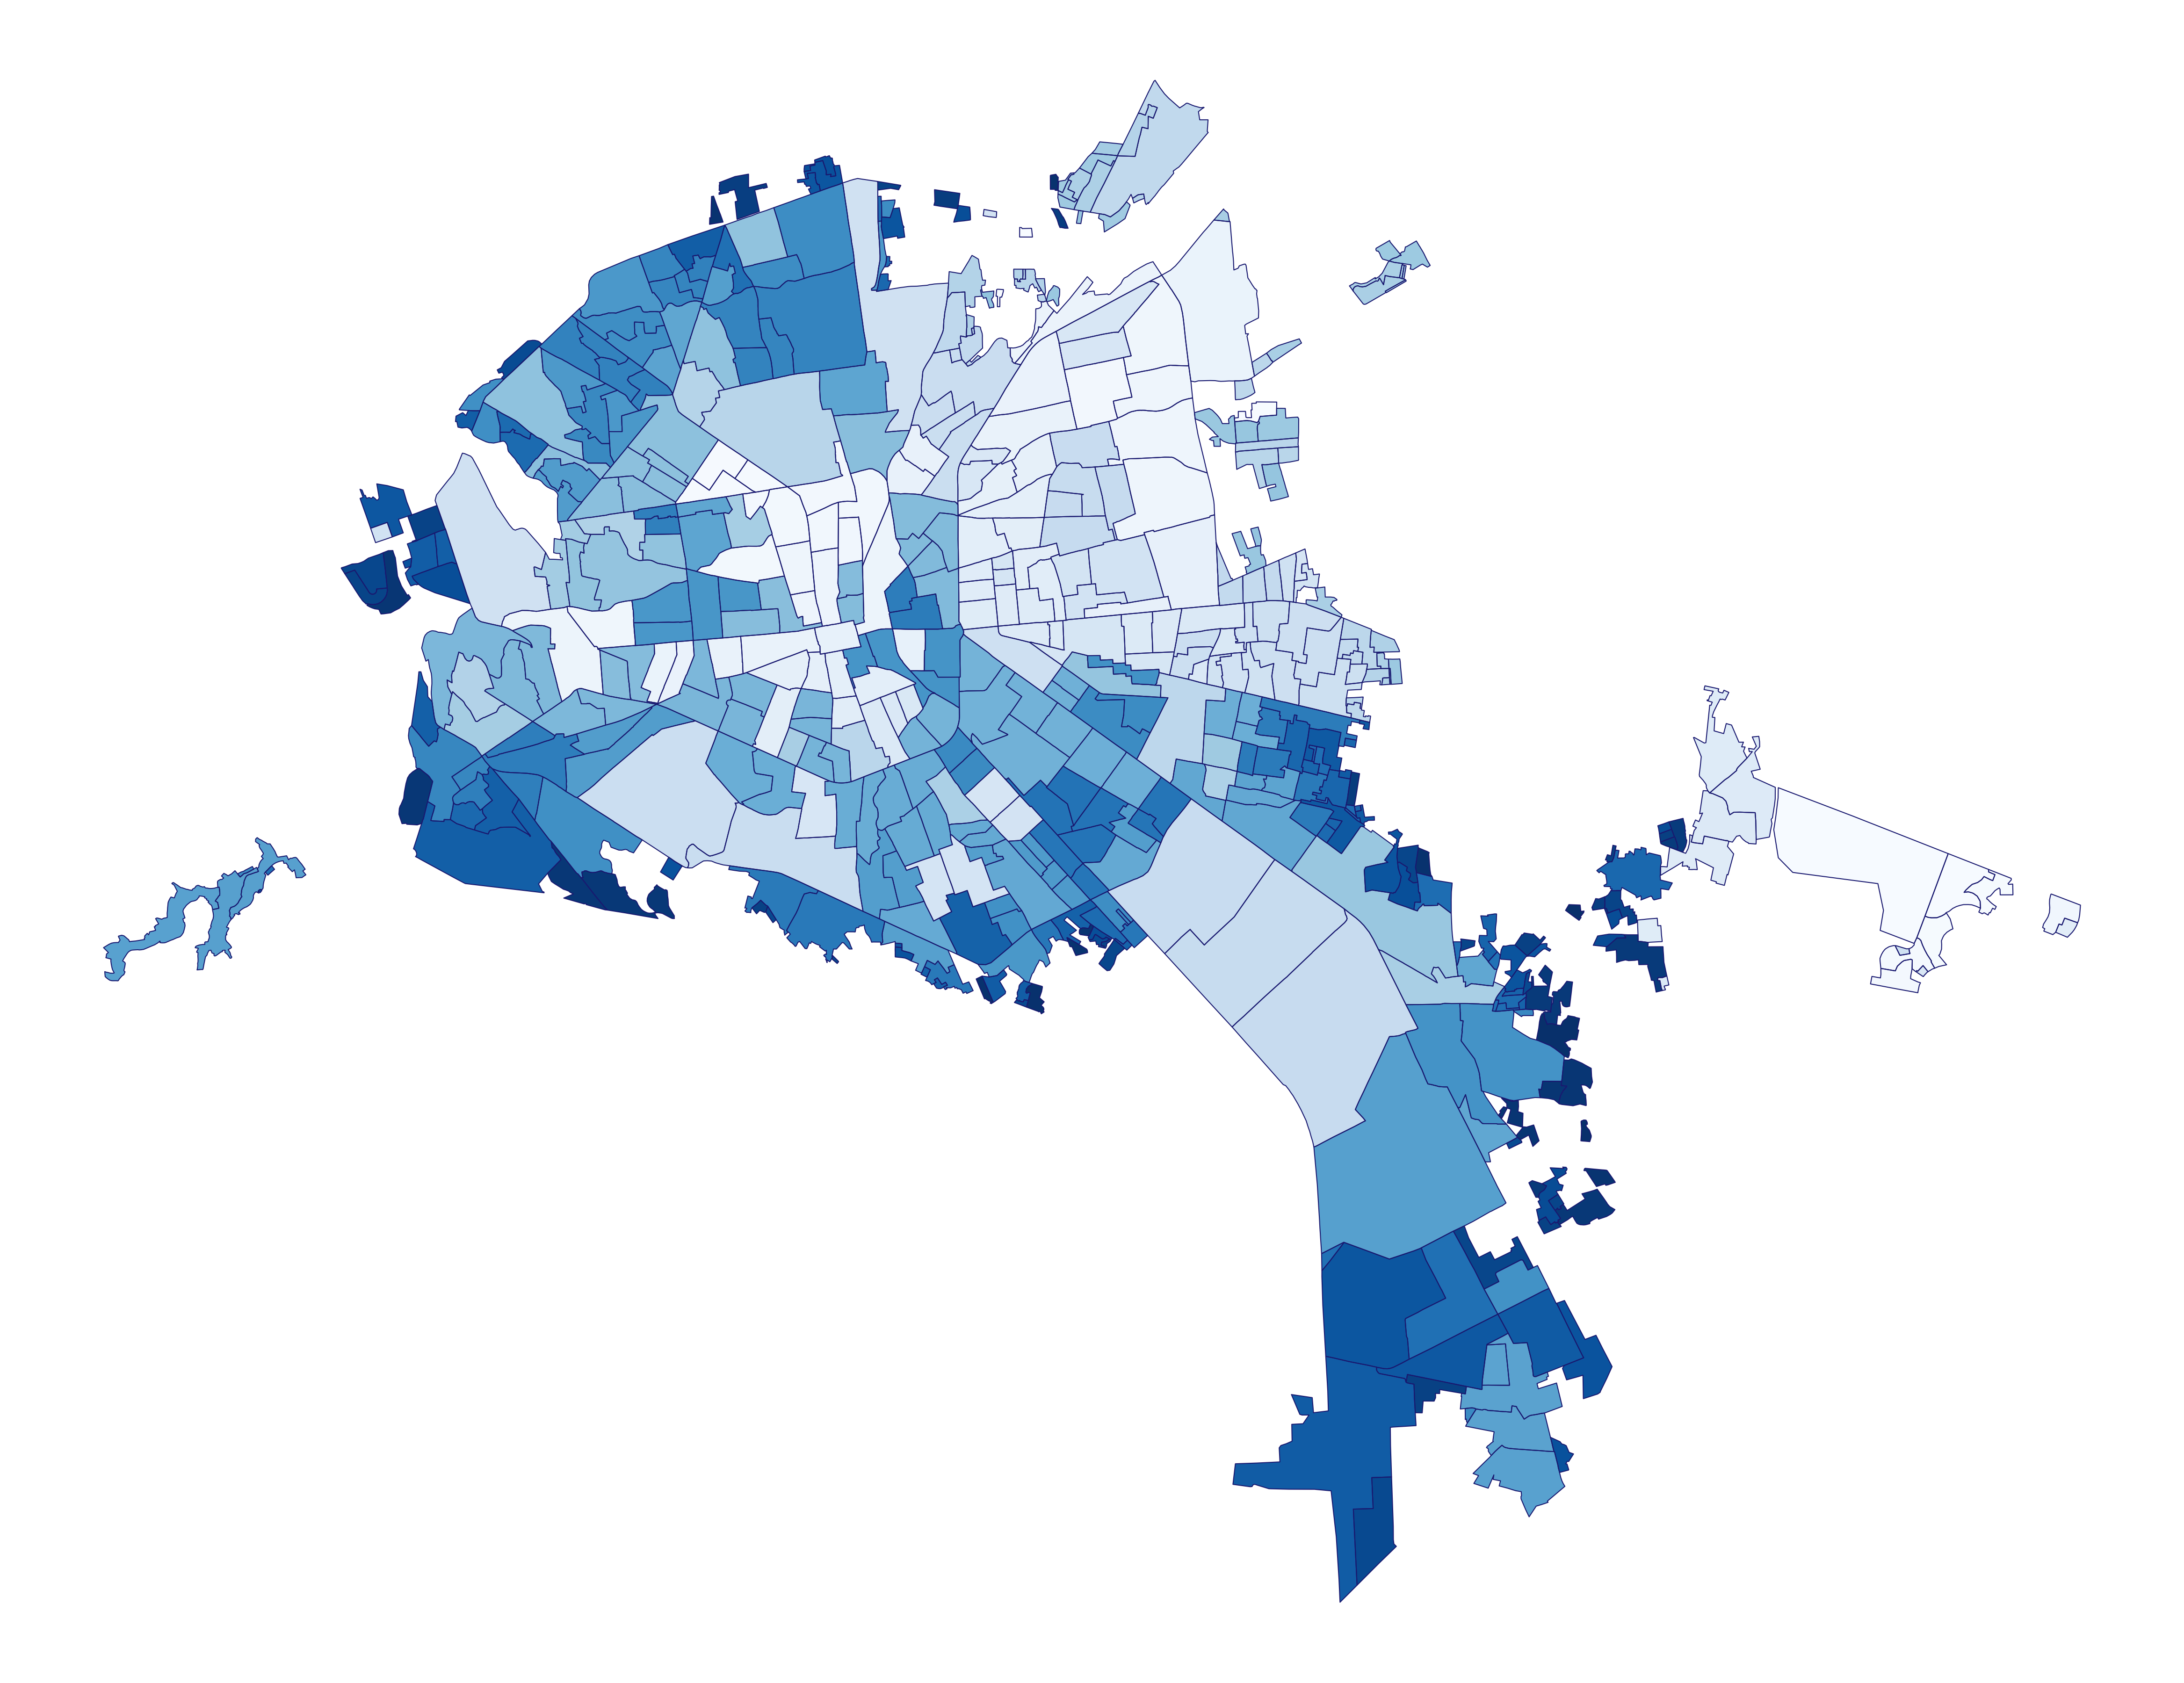

In [75]:
# Plot AGEBS
ax = gdf_zmslp.plot(figsize = (60, 60), column="CVE_AGEB", cmap = "Blues")
ax.set_axis_off()

# Include AGEB outlines.
gdf_zmslp.boundary.plot(ax=ax,figsize = (20, 20), edgecolor='midnightblue')
ax.set_axis_off()
